# Data exploration for Prophet forecasting

This notebook will help  explore raw telephony data and prepare it for time series forecasting with Prophet.

In [4]:
import pandas as pd
import numpy as np 

## load the data as CSV

Let's load  telephony dashboard data into a DataFrame. Update the path below if your file is in a different location.     

In [5]:
# import the data into the data frame

csv_path = '../data/55_weeks_call_data.csv'
try: 
    df = pd.read_csv(csv_path)
except FileNotFoundError:
    # try downloads as fallback
    csv_path = '/Users/clexp/Sync/Projects with Customers/HSMA/Primary_Care_Load_Management_Tool/data/55_weeks_call_data.csv'
    df = pd.read_csv(csv_path)

# Display the first few rows to verify the data loaded correctly
print("DataFrame shape:", df.shape)
df.head()


DataFrame shape: (5501, 39)


,Month,Day,Time,Date,Total Calls,Connected Calls,Calls Not Connected,Calls Not Connected (Length Limit Reached),Calls Not Connected (Contact Hung Up),Calls Not Connected (Caller Hangup Within 5 Seconds),...,Callback Avg Wait Time (s),Callback Avg Answer Time (s),Callback Avg Wrap Up Time (s),Callback Max Queue Length,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,Apr-24,Tue,08:00,02/04/2024,317,97,220,218.0,2.0,0,...,524.0,524.0,20.0,20,NaN,NaN,NaN,NaN,NaN,NaN
1,Apr-24,Tue,08:30,02/04/2024,185,58,127,124.0,3.0,0,...,620.0,620.0,19.0,20,NaN,NaN,NaN,NaN,NaN,NaN
2,Apr-24,Tue,09:00,02/04/2024,93,39,54,39.0,15.0,2,...,885.0,885.0,19.0,20,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-24,Tue,09:30,02/04/2024,70,33,37,21.0,16.0,5,...,974.0,951.0,18.0,20,NaN,NaN,NaN,NaN,NaN,NaN
4,Apr-24,Tue,10:00,02/04/2024,71,34,37,31.0,6.0,1,...,938.0,938.0,19.0,20,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# explore the data

# Get numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate statistics for numeric columns
stats_df = pd.DataFrame({
    'min': df[numeric_cols].min(),
    'max': df[numeric_cols].max(),
    'mean': df[numeric_cols].mean(),
    'median': df[numeric_cols].median(),
    'std': df[numeric_cols].std()
})

# Display the statistics
print("Statistical Summary of Numeric Columns:")
print("\n")
stats_df.round(2)  # Round to 2 decimal places for readability



Statistical Summary of Numeric Columns:




,min,max,mean,median,std
Total Calls,0.0,365.00,44.15,26.00,56.66
Connected Calls,0.0,107.00,19.65,18.00,13.98
Calls Not Connected,0.0,305.00,24.50,5.00,47.50
Calls Not Connected (Length Limit Reached),0.0,305.00,20.90,0.00,47.60
Calls Not Connected (Contact Hung Up),0.0,759.60,4.45,3.00,14.27
Calls Not Connected (Caller Hangup Within 5 Seconds),0.0,773.00,2.20,0.00,26.40
Calls Not Connected (Caller Hangup Within 10 Seconds),0.0,878.00,3.06,1.00,32.67
Calls Not Connected (Caller Hangup Within 20 Seconds),0.0,568.99,2.60,1.00,16.30
Availability (%),0.0,611.00,61.85,71.00,35.92
TOTAL CALLS INCLUDING HANGUPS (M),0.0,1729.00,366.00,286.00,306.03


In [7]:
# gather all the days into their own data frames and analyze call volume patterns

# Create a dictionary to store DataFrames for each day
day_dfs = {}

# Get unique days from the dataset
unique_days = df['Day'].unique()

# Create a DataFrame for each day and calculate statistics
for day in unique_days:
    # Filter data for the current day
    day_df = df[df['Day'] == day]
    
    # Calculate statistics for Total Calls
    stats = {
        'min': day_df['Total Calls'].min(),
        'max': day_df['Total Calls'].max(),
        'mean': day_df['Total Calls'].mean(),
        'median': day_df['Total Calls'].median(),
        'std': day_df['Total Calls'].std(),
        'count': len(day_df)
    }
    
    # Store the DataFrame and its statistics
    day_dfs[day] = {
        'data': day_df,
        'stats': stats
    }

# Print statistics for each day
print("Call Volume Statistics by Day:")
print("\n")
for day, data in day_dfs.items():
    print(f"\n{day}:")
    print(f"Number of time slots: {data['stats']['count']}")
    print(f"Minimum calls: {data['stats']['min']:.2f}")
    print(f"Maximum calls: {data['stats']['max']:.2f}")
    print(f"Mean calls: {data['stats']['mean']:.2f}")
    print(f"Median calls: {data['stats']['median']:.2f}")
    print(f"Standard deviation: {data['stats']['std']:.2f}")

# Create a summary DataFrame for easier comparison
summary_data = {
    'Day': [],
    'Min Calls': [],
    'Max Calls': [],
    'Mean Calls': [],
    'Median Calls': [],
    'Std Dev': [],
    'Time Slots': []
}

for day, data in day_dfs.items():
    summary_data['Day'].append(day)
    summary_data['Min Calls'].append(data['stats']['min'])
    summary_data['Max Calls'].append(data['stats']['max'])
    summary_data['Mean Calls'].append(data['stats']['mean'])
    summary_data['Median Calls'].append(data['stats']['median'])
    summary_data['Std Dev'].append(data['stats']['std'])
    summary_data['Time Slots'].append(data['stats']['count'])

summary_df = pd.DataFrame(summary_data)
print("\nSummary Table:")
print(summary_df.round(2))

Call Volume Statistics by Day:



Tue:
Number of time slots: 1113
Minimum calls: 0.00
Maximum calls: 365.00
Mean calls: 46.24
Median calls: 29.00
Standard deviation: 57.69

Wed:
Number of time slots: 1113
Minimum calls: 0.00
Maximum calls: 347.00
Mean calls: 34.11
Median calls: 23.00
Standard deviation: 48.85

Thu:
Number of time slots: 1113
Minimum calls: 0.00
Maximum calls: 363.00
Mean calls: 39.65
Median calls: 24.00
Standard deviation: 57.14

Fri:
Number of time slots: 1113
Minimum calls: 0.00
Maximum calls: 348.00
Mean calls: 35.18
Median calls: 22.00
Standard deviation: 47.86

Mon:
Number of time slots: 1049
Minimum calls: 0.00
Maximum calls: 356.00
Mean calls: 66.85
Median calls: 47.00
Standard deviation: 64.46

Summary Table:
   Day  Min Calls  Max Calls  Mean Calls  Median Calls  Std Dev  Time Slots
0  Tue          0        365       46.24          29.0    57.69        1113
1  Wed          0        347       34.11          23.0    48.85        1113
2  Thu          0        363

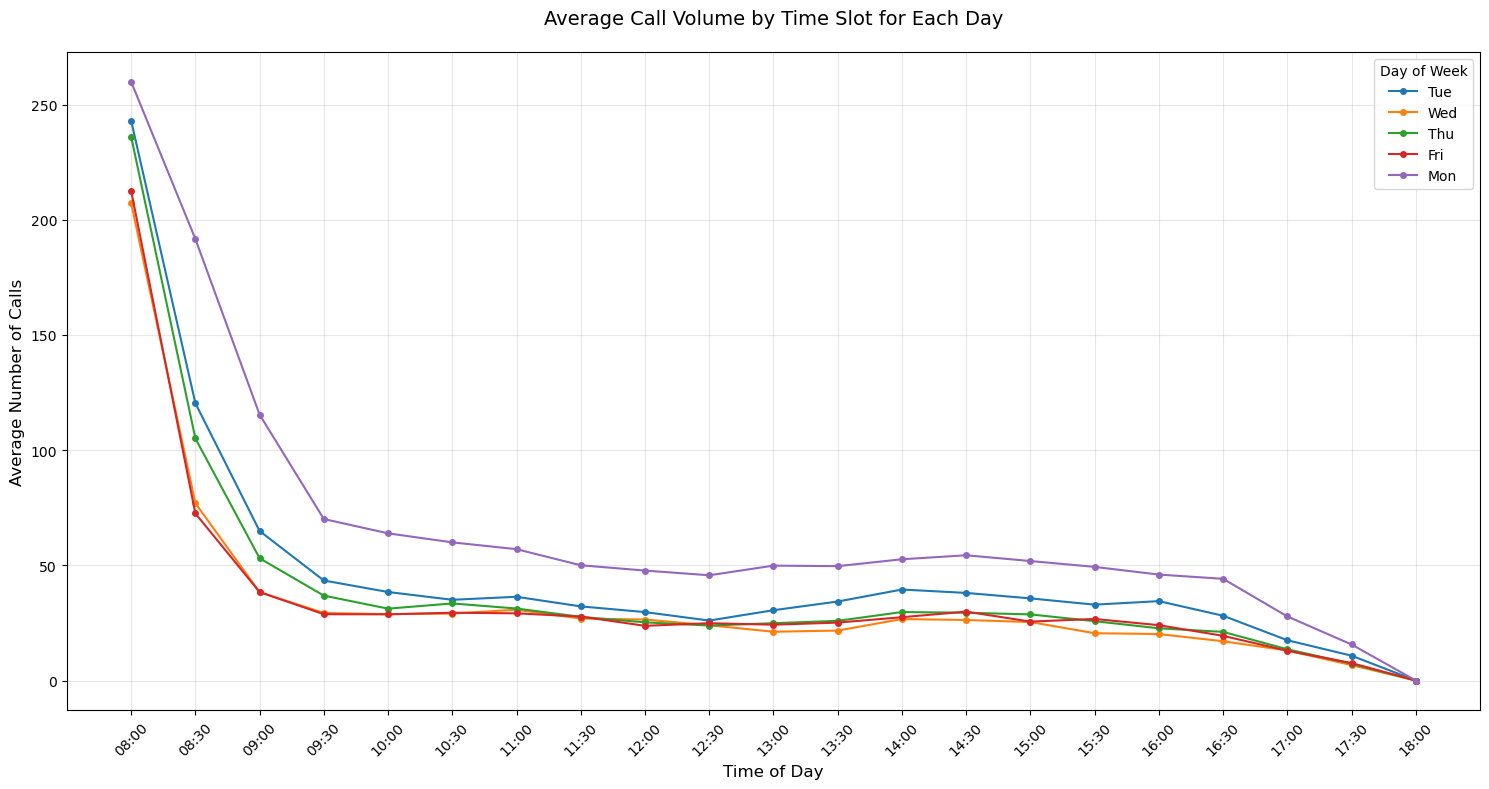


Time Slot Analysis by Day:

Tue:
     Time  Mean Calls  Std Dev  Count
0   08:00      243.04    67.86     53
1   08:30      120.38    83.54     53
2   09:00       64.89    47.13     53
3   09:30       43.42    23.63     53
4   10:00       38.42    17.58     53
5   10:30       35.04    15.66     53
6   11:00       36.34    15.69     53
7   11:30       32.17    15.51     53
8   12:00       29.70    12.42     53
9   12:30       26.02    10.20     53
10  13:00       30.51    15.92     53
11  13:30       34.28    19.57     53
12  14:00       39.49    22.32     53
13  14:30       38.02    22.99     53
14  15:00       35.64    16.95     53
15  15:30       32.92    19.07     53
16  16:00       34.45    21.80     53
17  16:30       28.11    19.97     53
18  17:00       17.49     8.92     53
19  17:30       10.77     5.94     53
20  18:00        0.00     0.00     53

Wed:
     Time  Mean Calls  Std Dev  Count
0   08:00      207.25    78.77     53
1   08:30       76.94    61.09     53
2   09:00 

In [8]:
# Create time slot analysis and visualization for each day

# First, let's create a function to process the time slot data for each day
def create_time_slot_analysis(day_df):
    # Group by time slot and calculate statistics
    time_slot_stats = day_df.groupby('Time').agg({
        'Total Calls': ['mean', 'std', 'count']
    }).reset_index()
    
    # Flatten the multi-level columns
    time_slot_stats.columns = ['Time', 'Mean Calls', 'Std Dev', 'Count']
    
    # Sort by time
    time_slot_stats = time_slot_stats.sort_values('Time')
    
    return time_slot_stats

# Create a dictionary to store time slot analysis for each day
time_slot_analysis = {}

# Process each day's data
for day, data in day_dfs.items():
    time_slot_analysis[day] = create_time_slot_analysis(data['data'])

# Create a combined DataFrame for plotting
plot_data = pd.DataFrame()

# Combine all days' data for plotting
for day, stats in time_slot_analysis.items():
    temp_df = stats[['Time', 'Mean Calls']].copy()
    temp_df['Day'] = day
    plot_data = pd.concat([plot_data, temp_df])

# Create the visualization
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(15, 8))

# Define colors for each day
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the plot
for i, day in enumerate(unique_days):
    day_data = plot_data[plot_data['Day'] == day]
    plt.plot(day_data['Time'], day_data['Mean Calls'], 
             label=day, marker='o', markersize=4, color=colors[i])

# Customize the plot
plt.title('Average Call Volume by Time Slot for Each Day', fontsize=14, pad=20)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Average Number of Calls', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Day of Week')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print the time slot analysis for each day
print("\nTime Slot Analysis by Day:")
for day, stats in time_slot_analysis.items():
    print(f"\n{day}:")
    print(stats.round(2))

## Prophet Model Training and Visualization

### Model Training Process
1. **Data Preparation**
   - We've already prepared our data with:
     - `ds`: datetime column (30 min timestamps)
     - `y`: Total Calls column (call volumes)

2. **Model Configuration**
   - Daily seasonality enabled (captures hourly patterns)
   - Weekly seasonality enabled (captures day-of-week patterns)
   - Custom business hours seasonality (Fourier order 3)
   - Moderate trend flexibility (changepoint_prior_scale=0.05)
   - Strong seasonality (seasonality_prior_scale=10)

3. **Training and Prediction**
   - Model is fitted to historical data
   - Future dataframe created for 7 days of hourly predictions
   - Predictions include:
     - Point forecasts
     - Confidence intervals (95%)

4. **Visualization Components**
   - Main forecast plot:
     - Historical data (black dots)
     - Forecast line (blue)
     - Confidence intervals (light blue)
   - Component plots:
     - Trend
     - Weekly seasonality
     - Daily seasonality
     - Custom business hours seasonality

### What to Look For
- How well the forecast follows historical patterns
- Width of confidence intervals
- Strength of different seasonal components
- Any unusual patterns or anomalies

## Prophet Model Training and Visualization

### Model Training Process
1. **Data Preparation**
   - We've already prepared our data with:
     - `ds`: datetime column (hourly timestamps)
     - `y`: Total Calls column (call volumes)

2. **Model Configuration**
   - Daily seasonality enabled (captures hourly patterns)
   - Weekly seasonality enabled (captures day-of-week patterns)
   - Custom business hours seasonality (Fourier order 3)
   - Moderate trend flexibility (changepoint_prior_scale=0.05)
   - Strong seasonality (seasonality_prior_scale=10)

3. **Training and Prediction**
   - Model is fitted to historical data
   - Future dataframe created for 7 days of hourly predictions
   - Predictions include:
     - Point forecasts
     - Confidence intervals (95%)

4. **Visualization Components**
   - Main forecast plot:
     - Historical data (black dots)
     - Forecast line (blue)
     - Confidence intervals (light blue)
   - Component plots:
     - Trend
     - Weekly seasonality
     - Daily seasonality
     - Custom business hours seasonality

### What to Look For
- How well the forecast follows historical patterns
- Width of confidence intervals
- Strength of different seasonal components
- Any unusual patterns or anomalies

# Now build a prophet call volume model

import the library

In [9]:

from prophet import Prophet

## Setting up the Prophet Model

Prophet is a powerful time series forecasting tool that can handle:
- Daily seasonality (which we observed in our data exploration)
- Weekly patterns (different call volumes by day of week)
- Trend changes
- Holiday effects

We'll configure the model with parameters that make sense for our call center data:
- `daily_seasonality=True`: Enable daily patterns (we saw clear time-of-day patterns)
- `weekly_seasonality=True`: Enable weekly patterns (we observed different patterns by day)
- `yearly_seasonality=False`: We don't have enough data for yearly patterns
- `changepoint_prior_scale=0.05`: Moderate flexibility in trend changes
- `seasonality_prior_scale=10`: Strong seasonality (we saw clear patterns in our exploration)

In [10]:
# Create Prophet DataFrame with just the columns we need
prophet_df = pd.DataFrame({
    'ds': pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M'),
    'y': df['Total Calls']
})

# Add UK holidays
from prophet.make_holidays import make_holidays_df
years = [2025, 2026]
uk_holidays = make_holidays_df(year_list=years, country='UK')

# Add window columns
uk_holidays['lower_window'] = -1  # Effect starts 1 day before
uk_holidays['upper_window'] = 1   # Effect lasts 1 day after


# Initialize the Prophet model with our previously discussed parameters
model = Prophet(
    daily_seasonality=True,      # Enable daily patterns
    weekly_seasonality=True,     # Enable weekly patterns
    yearly_seasonality=False,    # Disable yearly patterns (insufficient data)
    changepoint_prior_scale=0.05,  # Moderate flexibility in trend changes
    seasonality_prior_scale=15,    # Strong seasonality
    interval_width=0.95,           # 95% prediction intervals
    growth='logistic',
    holidays=uk_holidays  # Add holidays during model initialization
)

# Add custom seasonality for more complex daily patterns
model.add_seasonality(
    name='daily',
    period=1, # pattern repeats each day
    fourier_order=10  # This is the correct way to set Fourier order for custom seasonality
)

# Add floor and cap for logistic growth
prophet_df['floor'] = 0
# add something about the max being a variation of the standard deviation
prophet_df['cap'] = prophet_df['y'].max() * 3.0


## Understanding Custom Seasonality and Fourier Order

### Custom Seasonality for Business Hours
The `add_seasonality()` method allows us to add custom seasonal patterns to our Prophet model. In our case, we're adding a business hours component because call centers typically have distinct patterns during operating hours versus non-operating hours.

### Fourier Order Explained
The `fourier_order` parameter (set to 3 in our model) is a crucial component that determines how complex our seasonal pattern can be:

- **What is Fourier Order?**
  - It represents the number of Fourier terms used to model the seasonal pattern
  - Higher orders allow for more complex patterns
  - Lower orders create smoother, simpler patterns

- **Why Order 3?**
  - Order 1: Basic sine wave (too simple for call patterns)
  - Order 2: Can capture basic peaks and troughs
  - Order 3: Can model more complex patterns like:
    - Morning rush
    - Lunchtime dip
    - Afternoon peak
    - End-of-day patterns

- **Trade-offs:**
  - Higher orders (4+) might overfit to noise in the data
  - Lower orders (1-2) might miss important patterns
  - Order 3 provides a good balance for call center data

### The `period` Parameter
- Set to 1 in our model
- Represents the length of the seasonal pattern in days
- For business hours, we use 1 because the pattern repeats daily

### The `condition_name` Parameter
- Set to 'is_business_hours'
- This will be used to create a binary feature indicating whether a time point falls within business hours
- Helps the model distinguish between operating and non-operating hours

This custom seasonality component will help our model better capture the distinct patterns we observed in our data exploration, particularly the variations in call volume during different times of the business day.

In [11]:



# Display the first few rows to verify
print("DataFrame shape:", prophet_df.shape)
print("\nFirst few rows:")
print(prophet_df.head())

# Display basic statistics
print("\nBasic statistics:")
print(prophet_df.describe())

# Check for any missing values
print("\nMissing values:")
print(prophet_df.isnull().sum())

DataFrame shape: (5501, 4)

First few rows:
                   ds    y  floor     cap
0 2024-04-02 08:00:00  317      0  1095.0
1 2024-04-02 08:30:00  185      0  1095.0
2 2024-04-02 09:00:00   93      0  1095.0
3 2024-04-02 09:30:00   70      0  1095.0
4 2024-04-02 10:00:00   71      0  1095.0

Basic statistics:
                                  ds            y   floor     cap
count                           5501  5501.000000  5501.0  5501.0
mean   2024-10-05 02:56:33.855662592    44.147791     0.0  1095.0
min              2024-04-02 08:00:00     0.000000     0.0  1095.0
25%              2024-07-04 13:00:00    18.000000     0.0  1095.0
50%              2024-10-04 18:00:00    26.000000     0.0  1095.0
75%              2025-01-06 12:30:00    44.000000     0.0  1095.0
max              2025-04-07 17:30:00   365.000000     0.0  1095.0
std                              NaN    56.659386     0.0     0.0

Missing values:
ds       0
y        0
floor    0
cap      0
dtype: int64


## Prophet Model Training and Visualization

### Model Training Process
1. **Data Preparation**
   - We've already prepared our data with:
     - `ds`: datetime column (hourly timestamps)
     - `y`: Total Calls column (call volumes)

2. **Model Configuration**
   - Daily seasonality enabled (captures hourly patterns)
   - Weekly seasonality enabled (captures day-of-week patterns)
   - Custom business hours seasonality (Fourier order 3)
   - Moderate trend flexibility (changepoint_prior_scale=0.05)
   - Strong seasonality (seasonality_prior_scale=10)

3. **Training and Prediction**
   - Model is fitted to historical data
   - Future dataframe created for 7 days of hourly predictions
   - Predictions include:
     - Point forecasts
     - Confidence intervals (95%)

4. **Visualization Components**
   - Main forecast plot:
     - Historical data (black dots)
     - Forecast line (blue)
     - Confidence intervals (light blue)
   - Component plots:
     - Trend
     - Weekly seasonality
     - Daily seasonality
     - Custom business hours seasonality

### What to Look For
- How well the forecast follows historical patterns
- Width of confidence intervals
- Strength of different seasonal components
- Any unusual patterns or anomalies

## Adding holidays to the model

You can import the holidays from the holidays library, this will account for bank holidays and other days that are not typically business days. However this will only notice what is happening on holidays, for this dataset holidays are 0 calls. 

I want to see how holidays are affecting the days before and after the holiday. we do this by increasing the size of the window.

#### Wave-Trough-Wave (Pre- and Post-Holiday Surges) and Fourier Order
A "wave-trough-wave" pattern—where you see a dip (zero calls) on holidays and surges before and after—can be challenging for Prophet's default seasonality settings. Prophet models seasonality using partial Fourier sums: the higher the Fourier order, the more complex and rapid changes the seasonal component can capture

If the surges before and after holidays are sharp and the trough (holiday) is very deep (zero calls), increasing the Fourier order for the relevant seasonality (e.g., weekly or daily) can help Prophet better fit these abrupt changes. However, be cautious: too high a Fourier order can lead to overfitting or instability, especially with noisy data

## Prophet Model Training and Visualization

### Model Training Process
1. **Data Preparation**
   - We've already prepared our data with:
     - `ds`: datetime column (hourly timestamps)
     - `y`: Total Calls column (call volumes)

2. **Model Configuration**
   - Daily seasonality enabled (captures hourly patterns)
   - Weekly seasonality enabled (captures day-of-week patterns)
   - Custom business hours seasonality (Fourier order 3)
   - Moderate trend flexibility (changepoint_prior_scale=0.05)
   - Strong seasonality (seasonality_prior_scale=10)

3. **Training and Prediction**
   - Model is fitted to historical data
   - Future dataframe created for 7 days of hourly predictions
   - Predictions include:
     - Point forecasts
     - Confidence intervals (95%)

4. **Visualization Components**
   - Main forecast plot:
     - Historical data (black dots)
     - Forecast line (blue)
     - Confidence intervals (light blue)
   - Component plots:
     - Trend
     - Weekly seasonality
     - Daily seasonality
     - Custom business hours seasonality

### What to Look For
- How well the forecast follows historical patterns
- Width of confidence intervals
- Strength of different seasonal components
- Any unusual patterns or anomalies

In [12]:
model.fit(prophet_df)

10:43:24 - cmdstanpy - INFO - Chain [1] start processing
10:43:24 - cmdstanpy - INFO - Chain [1] done processing


## Create a prediction 

We need to know what we are predicting, we are predicting working weekdays only, so we need to create a future dataframe that only includes working days.

In [14]:


# Define the number of days to predict into the future
num_days = 30  # for example, next 30 days

# Create a date range for the full period with 30-minute frequency
full_range = pd.date_range(start=pd.Timestamp.today().normalize(), periods=num_days*48, freq='30min')

# Filter to keep only working weekdays (Monday=0 to Friday=4)
working_weekdays = full_range[full_range.dayofweek < 5]

# Create a DataFrame for Prophet future dataframe
future_df = pd.DataFrame({'ds': working_weekdays})

# Define working hours (e.g., 8am to 6pm)
start_hour = 8
end_hour = 18

# Filter to keep only working hours
future_df = future_df[(future_df['ds'].dt.hour >= start_hour) & (future_df['ds'].dt.hour < end_hour)]


## And now make the prediction

In [15]:
# Make predictions
# Add floor and cap to future dataframe
future_df['floor'] = 0
future_df['cap'] = prophet_df['y'].max() * 3.0

# Make predictions
forecast = model.predict(future_df)



#### Plot the results

We can use a pandas dataframe to plot the results, or we can use the prophet plot function.

/Users/clexp/Sync/hsma/anaconda3/envs/prophet_env/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/clexp/Sync/hsma/anaconda3/envs/prophet_env/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


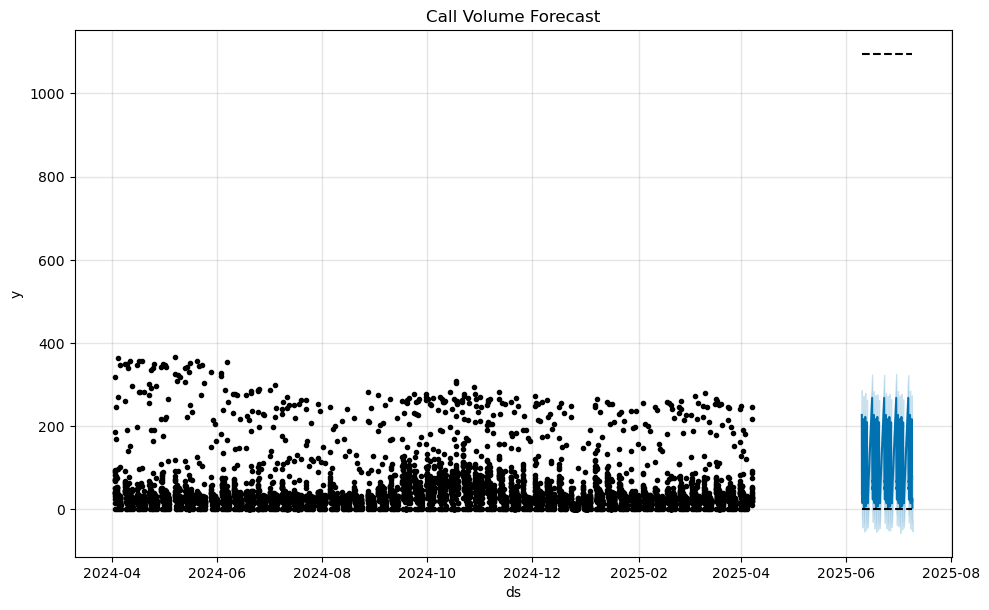

In [16]:
import matplotlib.pyplot as plt


# Plot the results
fig = model.plot(forecast)
plt.title('Call Volume Forecast')
plt.show()




## Comments

This day to covers a timeframe starting when the original data started and going ahead into the future. 

It appears to show data similar to the original data. It is not clear if this is the original data or predictions comparable to the original data. It might be interesting to present the original data in this format for comparison. There appears to be a drop in the upper limit around June 20 24. If this is a prediction, it's not clear why this is. That also appears to be a surge in the body of causes around September to October 2024 it is known there was a staffing change at this time.

 If this is a prediction, it's not clear why this is. That also appears to be a surge in the body of causes around September to October 2024 it is known there was a staffing change at this time.

Bizarrely, there is a gap from April to June 192025. It is not clear why This is. The data than reappearance for June and July 192025 and appears in a different format.

It is clear this needs much more close examining.

Forecast DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ds                           440 non-null    datetime64[ns]
 1   trend                        440 non-null    float64       
 2   cap                          440 non-null    float64       
 3   floor                        440 non-null    int64         
 4   yhat_lower                   440 non-null    float64       
 5   yhat_upper                   440 non-null    float64       
 6   trend_lower                  440 non-null    float64       
 7   trend_upper                  440 non-null    float64       
 8   Boxing Day                   440 non-null    float64       
 9   Boxing Day_lower             440 non-null    float64       
 10  Boxing Day_upper             440 non-null    float64       
 11  Boxing Day (observed

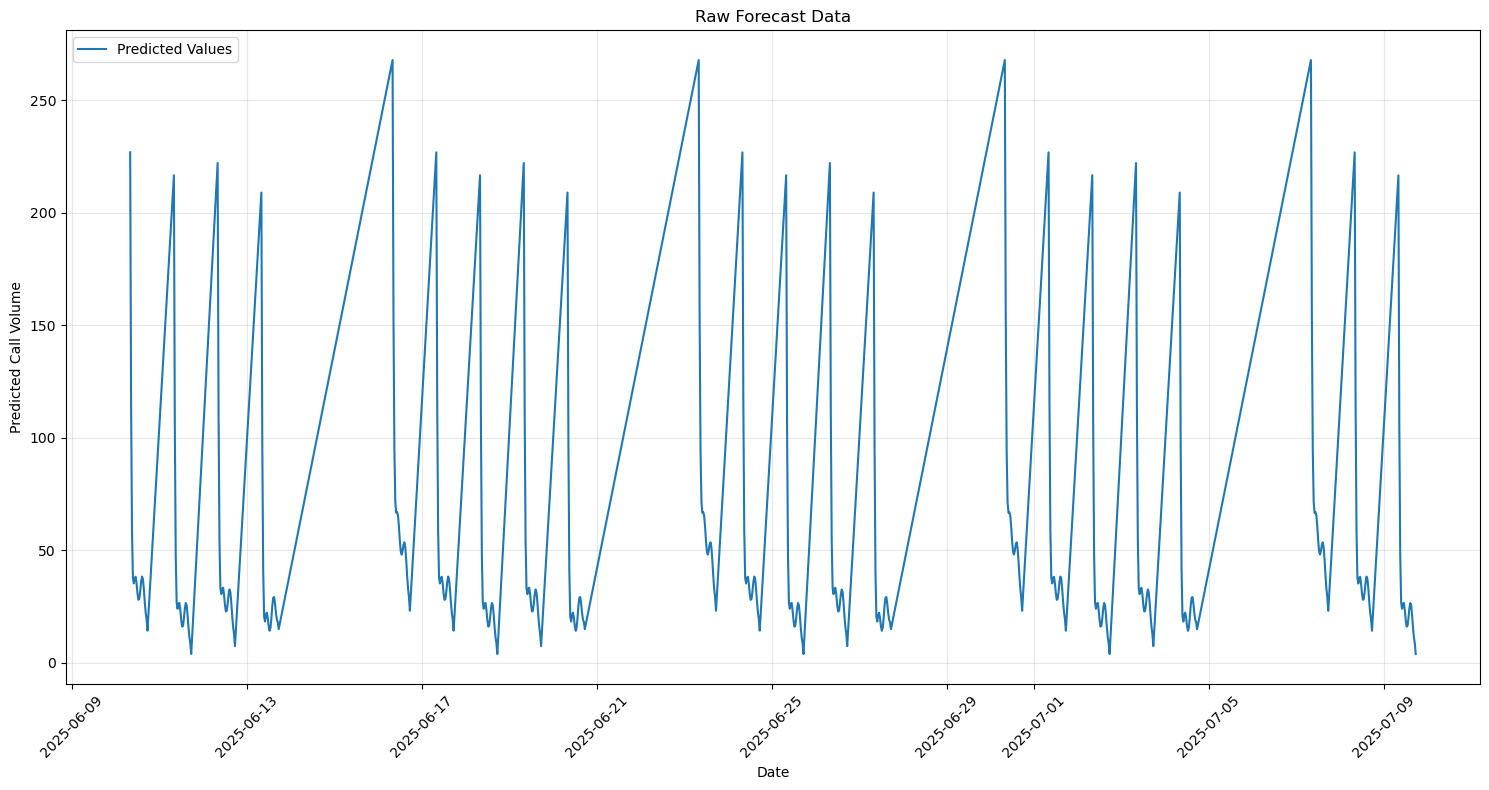

In [17]:
# Let's examine what we have in our forecast data
print("Forecast DataFrame Info:")
print(forecast.info())
print("\nFirst few rows of forecast:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
print("\nLast few rows of forecast:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Let's look at the date range
print("\nDate range in forecast:")
print("Start date:", forecast['ds'].min())
print("End date:", forecast['ds'].max())

# Let's look at any gaps in the data
date_range = pd.date_range(start=forecast['ds'].min(), end=forecast['ds'].max(), freq='30min')
missing_dates = set(date_range) - set(forecast['ds'])
if missing_dates:
    print("\nGaps in the data:")
    for date in sorted(missing_dates):
        print(date)
else:
    print("\nNo gaps in the data")

# Let's look at the distribution of predictions
print("\nSummary statistics of predictions:")
print(forecast['yhat'].describe())

# Let's plot the raw forecast data to see the patterns
plt.figure(figsize=(15, 8))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Values')
plt.title('Raw Forecast Data')
plt.xlabel('Date')
plt.ylabel('Predicted Call Volume')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


### predicted curves

These predicted curves look like 4 to 4 1/2 typical week predictions. Hire in the mornings and higher on Mondays. It is difficult to avoid drawing the line overnight and over the weekend.

In [19]:
# Let's examine June 2024 in detail
june_2024 = forecast[forecast['ds'].dt.year == 2024][forecast['ds'].dt.month == 6]

print("Do we have any June 2024 data?")
print("Number of rows:", len(june_2024))
if len(june_2024) > 0:
    print("\nDate range in June 2024:")
    print("Start date:", june_2024['ds'].min())
    print("End date:", june_2024['ds'].max())
else:
    print("No data found for June 2024")

# Let's see what months we actually have data for
print("\nMonths in our forecast data:")
print(forecast['ds'].dt.to_period('M').unique())


Do we have any June 2024 data?
Number of rows: 0
No data found for June 2024

Months in our forecast data:
<PeriodArray>
['2025-06', '2025-07']
Length: 2, dtype: period[M]


/var/folders/l2/q0k20lzj1wvck3m41jjm0k140000gn/T/ipykernel_1181/3656650000.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  june_2024 = forecast[forecast['ds'].dt.year == 2024][forecast['ds'].dt.month == 6]


### Prediction carries the original data forward.

It seems the prediction carries the original data forward. What's revealing about this as it means that we need to look at the original data and explore what happened in June 2024 and again in October 20 24.

It seems the prediction carries the original data forward. What's revealing about this as it means that we need to look at the original data and explore what happened in June 2024 and again in October 20 24.

Not a particular reason why that should've been a drop in the ceiling nor is there a particular reason why the cool volume increased. The cool volume should not really be affected by the number of staff on. The wait time however should be. For now, let's draw the graph a bit more carefully.

/Users/clexp/Sync/hsma/anaconda3/envs/prophet_env/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/clexp/Sync/hsma/anaconda3/envs/prophet_env/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


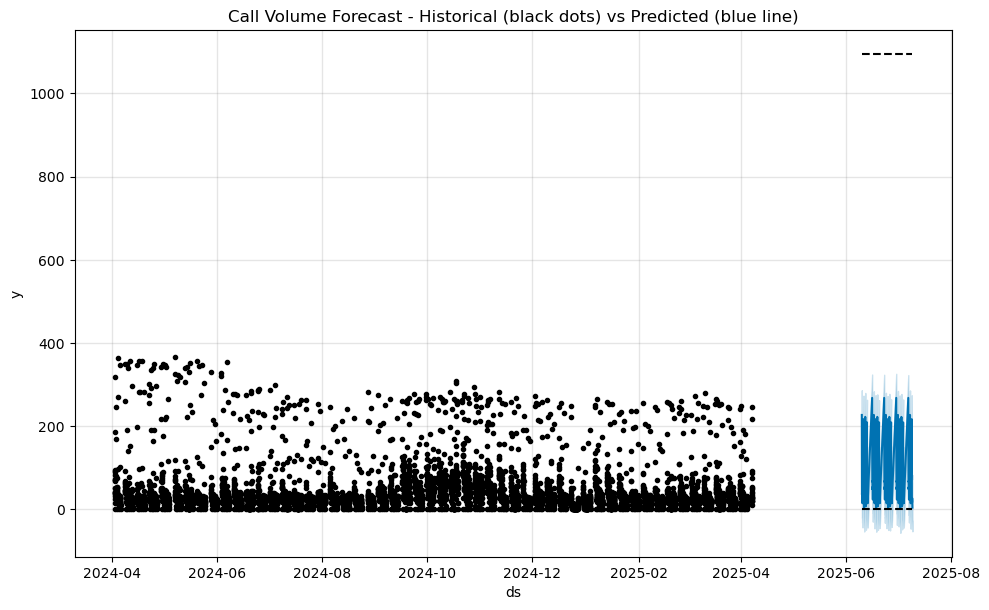

Historical data (prophet_df) date range:
Start: 2024-04-02 08:00:00
End: 2025-04-07 17:30:00

Predicted data (forecast) date range:
Start: 2025-06-10 08:00:00
End: 2025-07-09 17:30:00


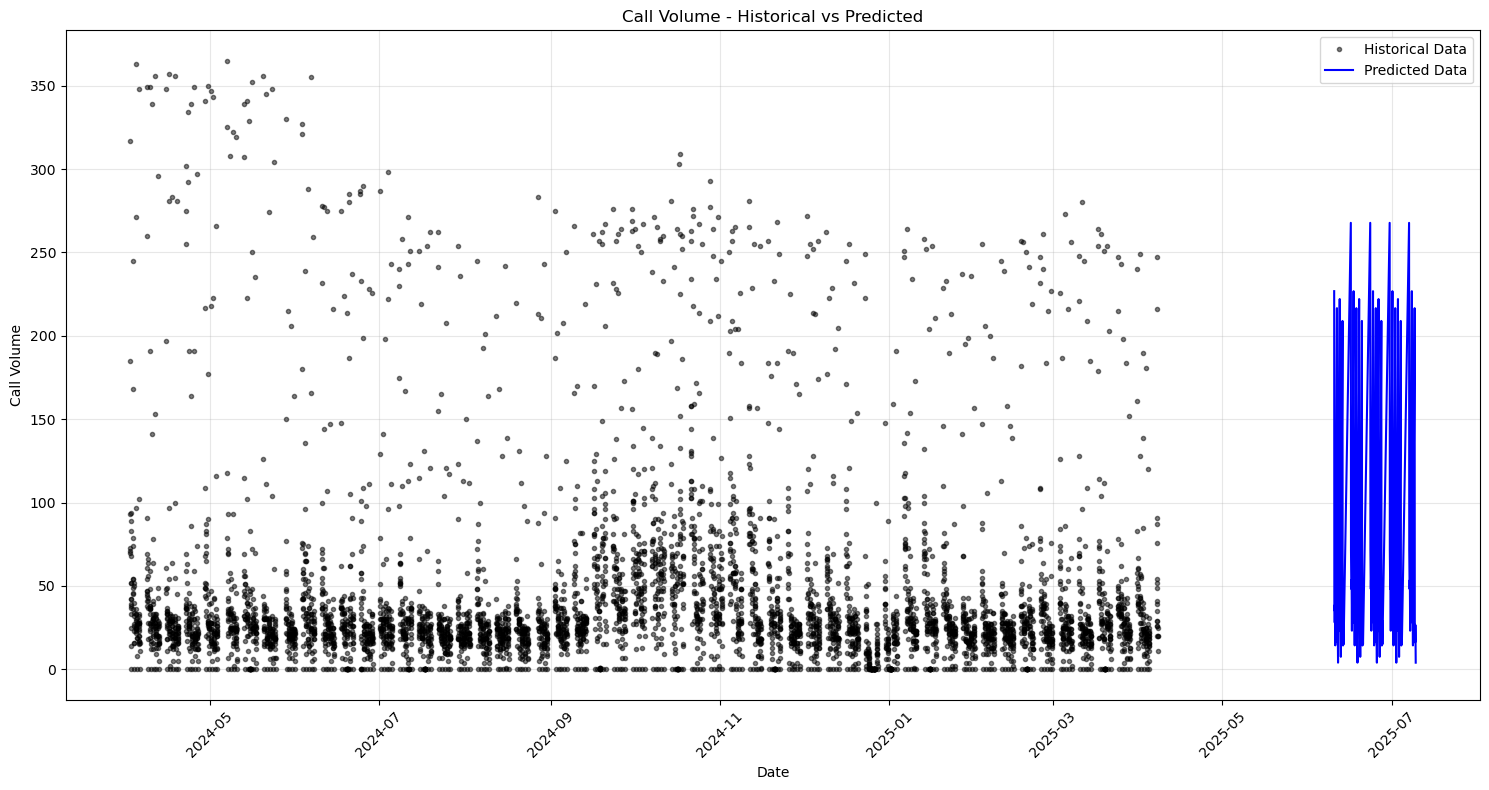

In [20]:
# Plot the results with clear distinction between historical and predicted data
fig = model.plot(forecast)
plt.title('Call Volume Forecast - Historical (black dots) vs Predicted (blue line)')
plt.show()

# Let's also look at the date ranges of both datasets
print("Historical data (prophet_df) date range:")
print("Start:", prophet_df['ds'].min())
print("End:", prophet_df['ds'].max())
print("\nPredicted data (forecast) date range:")
print("Start:", forecast['ds'].min())
print("End:", forecast['ds'].max())

# Let's plot them separately to make it even clearer
plt.figure(figsize=(15, 8))
plt.plot(prophet_df['ds'], prophet_df['y'], 'k.', label='Historical Data', alpha=0.5)
plt.plot(forecast['ds'], forecast['yhat'], 'b-', label='Predicted Data')
plt.title('Call Volume - Historical vs Predicted')
plt.xlabel('Date')
plt.ylabel('Call Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Non seasonal changes

The changes are clearer in this graph. There are nonseasonal changes to the call volume data. The maximum wait time really does drop in June. One exclamation might be that the cool cute duration might have been reduced. If this was the case you might expect that there is a bunching at the new call volume max. It could also be that the students collectively went home at that time. This takes about 5000 patients off the patient list of 35,000 people. You would expect them to return in September. There is a change in September but it's not a reversion of the June change. This is difficult to explain.

Comparing to the original data, it does show these lines.  I did not draw this before, but now it is clear.  



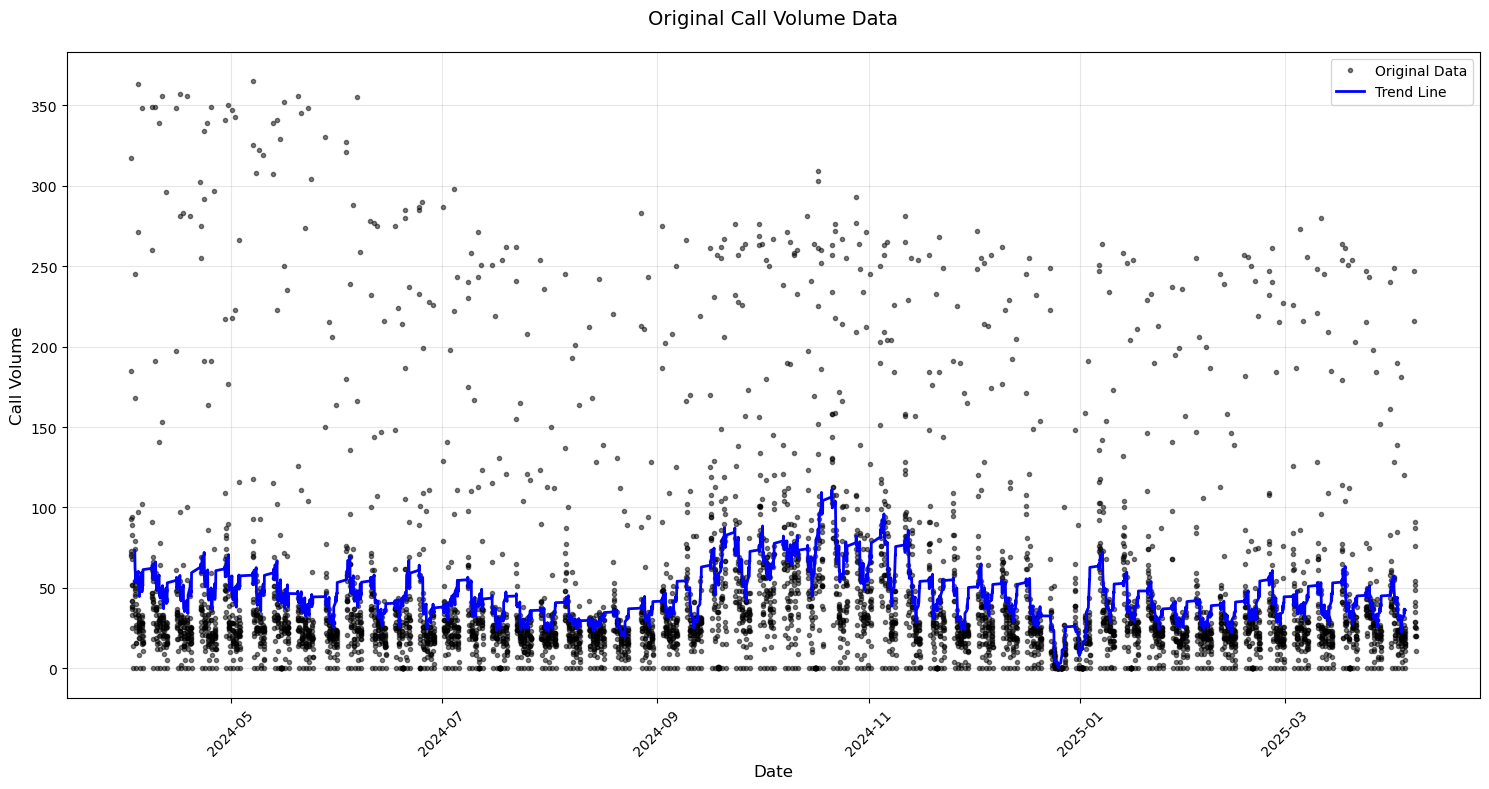


Original Data Statistics:
Date range: 2024-04-02 08:00:00 to 2025-04-07 17:30:00

Call Volume Statistics:
count    5501.000000
mean       44.147791
std        56.659386
min         0.000000
25%        18.000000
50%        26.000000
75%        44.000000
max       365.000000
Name: y, dtype: float64


In [21]:
# Plot the original data in the same style as the Prophet plot
plt.figure(figsize=(15, 8))

# Plot the original data
plt.plot(prophet_df['ds'], prophet_df['y'], 'k.', label='Original Data', alpha=0.5)

# Add a trend line using a simple moving average to show the pattern
window_size = 48  # 24 hours worth of 30-minute intervals
trend = prophet_df['y'].rolling(window=window_size, center=True).mean()
plt.plot(prophet_df['ds'], trend, 'b-', label='Trend Line', linewidth=2)

# Customize the plot
plt.title('Original Call Volume Data', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Call Volume', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print some basic statistics about the original data
print("\nOriginal Data Statistics:")
print("Date range:", prophet_df['ds'].min(), "to", prophet_df['ds'].max())
print("\nCall Volume Statistics:")
print(prophet_df['y'].describe())

### Comments

So here we can see that the original date it really does show the drop in June 2024 and the change in September to October 20 24.

So here we can see that the original date it really does show the drop in June 2024 and the change in September to October 20 24.

Tells us a couple of useful things:
When we use telephone data to assess potential future call volume we need to account for how this may fluctuate. This means we need to predict against a selected data set.

Looking at our data set I think the only timeframe we have reflecting the staffing arrangement and as the patients are expecting us to respond is January to April 2025. When we build our discreet event simulation model we need to be able to select which bits of data we're going to use.  

This means we may not be able to generate a seasonal pattern given the data we have. 

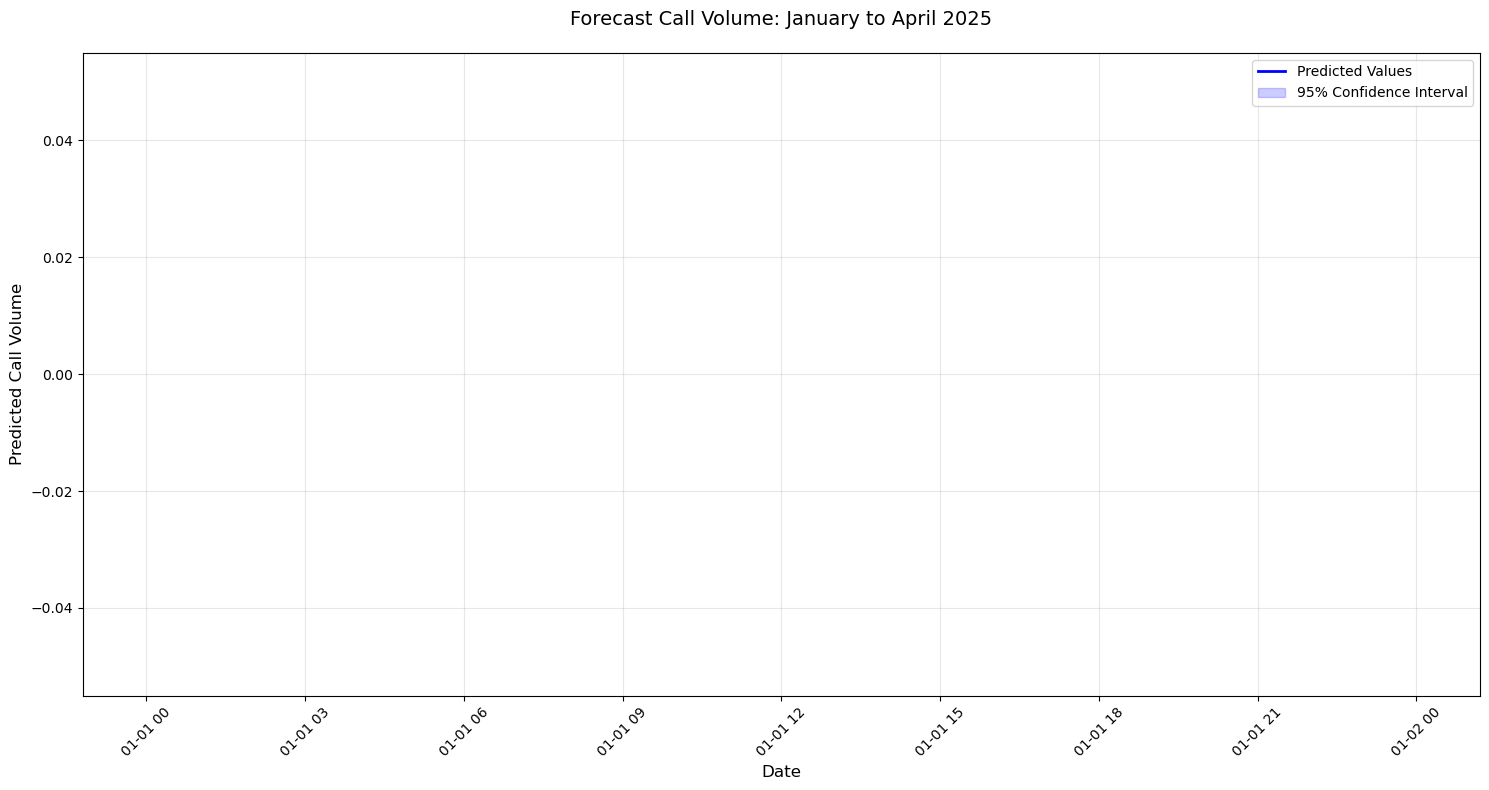


Forecast Statistics for Jan-Apr 2025:
Date range: NaT to NaT

Predicted Call Volume Statistics:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: yhat, dtype: float64

Monthly Statistics:

Month 1:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: yhat, dtype: float64

Month 2:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: yhat, dtype: float64

Month 3:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: yhat, dtype: float64

Month 4:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: yhat, dtype: float64


In [22]:
# Plot the original data in the same style as the Prophet plot
plt.figure(figsize=(15, 8))

# Plot the original data
plt.plot(prophet_df['ds'], prophet_df['y'], 'k.', label='Original Data', alpha=0.5)

# Add a trend line using a simple moving average to show the pattern
window_size = 48  # 24 hours worth of 30-minute intervals
trend = prophet_df['y'].rolling(window=window_size, center=True).mean()
plt.plot(prophet_df['ds'], trend, 'b-', label='Trend Line', linewidth=2)

# Customize the plot
plt.title('Original Call Volume Data', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Call Volume', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print some basic statistics about the original data
print("\nOriginal Data Statistics:")
print("Date range:", prophet_df['ds'].min(), "to", prophet_df['ds'].max())
print("\nCall Volume Statistics:")
print(prophet_df['y'].describe())